In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))

In [3]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.


Remove all rows that have at least one null value.


Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.


In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.


Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?


Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

In [4]:
crypto_df_True = crypto_df[crypto_df.IsTrading == True]
crypto_df_True = crypto_df_True.drop('IsTrading', axis=1)
crypto_df_True.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
crypto_df_NotNull = crypto_df_True.dropna()
crypto_df_NotNull.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [6]:
crypto_df_Mined = crypto_df_NotNull[crypto_df_NotNull.TotalCoinsMined != 0]
crypto_df_Mined.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [7]:
crypto_df_Comprehensible = crypto_df_Mined.drop('CoinName', axis=1)
crypto_df_Comprehensible.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [8]:
Dummies = ['Algorithm', 'ProofType']
Clean_crypto_df = pd.get_dummies(crypto_df_Comprehensible, columns = Dummies)
Clean_crypto_df.shape

(533, 101)

We have as many more columns as there were categories for both the Algorithm and ProoType columns.

In [9]:
# Clean_crypto_df['TotalCoinSupply'] = Clean_crypto_df['TotalCoinSupply'].astype(float)
scaler = MinMaxScaler()
Clean_crypto_df = Clean_crypto_df.set_index('Unnamed: 0')
Clean_crypto_scaled = scaler.fit_transform(Clean_crypto_df)
Clean_crypto_scaled

array([[5.94230127e-03, 4.20000000e-11, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.00182308e-03, 5.32000000e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.53420682e-02, 3.14159265e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.92655266e-03, 1.40022261e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.94962775e-03, 2.10000000e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.94243008e-03, 1.00000000e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Dimensionality Reduction


Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?


Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [11]:
pca = PCA(n_components=0.90)
Crypto_pca = pca.fit_transform(Clean_crypto_scaled)
Crypto_pca.shape

(533, 29)

We have dramatically reduced the number of dimensions, from 101 to 29.

In [12]:
tsne = TSNE(learning_rate = 100)
tsne_transform = tsne.fit_transform(Crypto_pca)

/Users/aurelianfousse/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [13]:
Clean_crypto_df['x'] = tsne_transform[:,0]
Clean_crypto_df['y'] = tsne_transform[:,1]


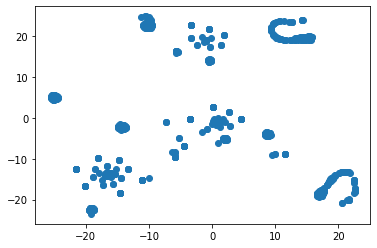

In [14]:
plt.scatter(Clean_crypto_df['x'], Clean_crypto_df['y'])
plt.show()

Distinct clusters are observed, roughly 9 to 15. 

Cluster Analysis with k-Means

Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

In [15]:
 inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Clean_crypto_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,3.542894e+24
1,2,1.061436e+24
2,3,6.225426e+23
3,4,2.451309e+23
4,5,1.285201e+23
5,6,7.865899e+22
6,7,5.568937e+22
7,8,4.062961e+22
8,9,2.978897e+22
9,10,2.180588e+22


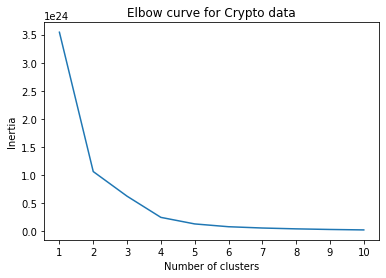

In [16]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Crypto data')
plt.show()

the elbow appears at k = 2 to 4.

The data set can be clustered at k = 3.